# Игра в ассоциации

# Снег

![image.png](guess.png)

## Структура

1. Смыслы и вектора

2. Машинки и деревья

## 1. Смыслы и вектора

__Компью́терная лингви́стика__ – это наука о том, как работать с языком (не всегда естественным), с помощью компьютерных методов.

К искусственным языкам относятся эсперанто, языки программирования, нотная грамота, азбука Морзе, шифровальные системы, жаргон и прочие.

## 1.1. Уровни компьютерного анализа языка

- Фонетика (какие слова имеют схожее звучание?)
- Морфология (какие есть составные части слова?)
- Синтаксис (какие слова выполняют одну и ту же функцию в предложении?)
- Семантика (какой смысл несёт в себе слово?)

> «Бесцветные зелёные идеи спят яростно»
> 
> Аврам Ноам Хомский

> «Лампа, светильник, подзатыльник»
> 
> не Аврам Ноам Хомский

Семантику слов нельзя проанализировать ни фонетически, ни морфологически, ни синтаксически.

## 1.2. Как быть?

Необходимо найти такие __репрезентации__ слов, чтобы синонимичные слова имели близкие репрезентации.

Существуют два фундаментальных подхода к определению семантики слов:
- Построение **онтологий** (knowledge-based approach)
- Извлечение значений из **употребления слов** (distributional approach)

## 1.3. Дистрибутивная гипотеза

> «Все на свете должно происходить медленно и неправильно, чтобы не сумел загордиться человек, чтобы человек был грустен и растерян»
> 
> Венедикт Ерофеев


> «Все на свете должно происходить затяжно и неправильно, чтобы не сумел загордиться человек, чтобы человек был грустен и растерян»
>
> не Венедикт Ерофеев

Лингвистические единицы, встречающиеся в схожих контекстах, имеют близкие значения.

## 1.4. Обучение компьютера семантике

__Кóрпус__ — подобранная и обработанная по определённым правилам совокупность текстов, используемых в качестве базы для исследования языка.

__Моде́ль__ — представление некоторого реального процесса, устройства или концепции.

### Как учим?

1. Берём корпус
2. Обучаем модель на корпусе
3. Получаем модель, которая описывает совместную встречаемость слов в корпусе

## 1.6. Модель в стакане

### Корпус

Ну, гравицаппа — это то, без чего пепелац может только так летать, а с гравицаппой в любую точку Вселенной фьють — за пять секунд.

Ребят, как же это вы без гравицаппы пепелац выкатываете из гаража? Это непорядок.

Ох! Да. Это возмутительно! Если коровы станут летать, то мне в космосе делать нечего!

### Предобработка 

гравицаппа пепелац летать гравицаппа точка вселенная фьють секунда.

ребята гравицаппа пепелац выкатывать гараж.

непорядок.

возмутительно.

корова летать космос делать.

### Матрица совместной встречаемости

In [47]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from pprint import pprint

In [19]:
teacup_matrix = pd.read_csv("dist_counting_model.csv", encoding='cp1251').fillna(0)
teacup_matrix

,x,гравицаппа,пепелац,летать,точка,вселенная,фьють,секунда,ребята,выкатывать,гараж,корова,космос,делать
0,гравицаппа,0.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,пепелац,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,летать,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,точка,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,вселенная,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,фьють,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,секунда,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,ребята,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,выкатывать,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,гараж,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


![image.png](teacup_matrix.png)

In [121]:
teacup_matrix[["x", "гравицаппа"]]

,x,гравицаппа
0,гравицаппа,0.0
1,пепелац,2.0
2,летать,1.0
3,точка,1.0
4,вселенная,0.0
5,фьють,0.0
6,секунда,0.0
7,ребята,1.0
8,выкатывать,0.0
9,гараж,0.0


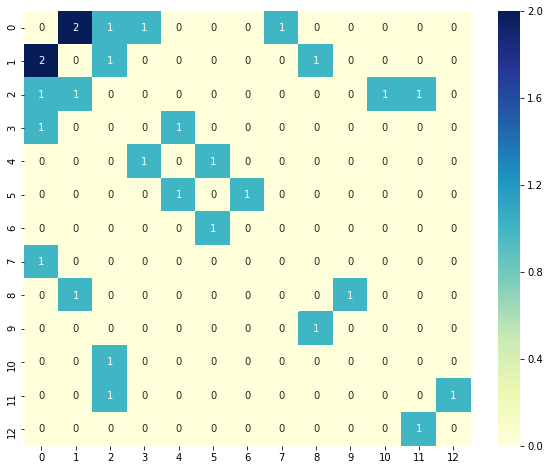

In [21]:
import seaborn as sns
my_data = np.genfromtxt('matrix.csv', delimiter=',')

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(my_data, cmap="YlGnBu", annot=True)

![](tteacup.png)

# 2. Семантические вектора
В традиционной дистрибутивной семантике слова описываются векторами, где в качестве измерений (компонентов) выступают соседи этих слов в текстовом корпусе. Количество измерений вектора в **счётной модели** равно количеству слов в корпусе. 

## 2.1. Многомерное векторное пространство
 Получено **многомерное векторное пространство**
1. Слова являются **координатными осями**
2. Слова являются **векторами** в этом многомерном пространстве
3. Количество измерений равно количеству слов в корпусе
4. Векторы **разреженные**

## 2.2. Матрица совместной встречаемости
При создании **матрицы совместной встречаемости** можно смотреть не только на непосредственных соседей, но и на слова, находящиеся в **контекстном окне**.

... животных (в том числе и у **[человека) различают головной _мозг_, размещённый в полости черепа]**, и спинной ...

Можно использовать не абсолютную частоту совместной встречаемости слов, а как-либо её взвешивать. Коэффициент Дайса:
$$ Dice(w,w') = \frac{2c(w,w')}{c(w)+c(w')}, $$
где

$c(w)$ - абсолютная частота встречаемости слова $w$,

$c(w')$ - абсолютная частота встречаемости слова $w'$,

$c(w,w')$ - частота совместной встречаемости слов $w,w'$.

# 3. Семантическая близость

## 3.1. Косинусная близость
Классический способ определения семантической близости слов в векторном пространстве.
- Схожесть слов выше по мере уменьшения угла между векторами слов
- Схожесть слов выше по мере увеличения косинуса угла между векторами слов


$$ cos(w, w') = \frac{(\overrightarrow{V}(w), \overrightarrow{V}(w'))}{|\overrightarrow{V}(w)| \cdot |\overrightarrow{V}(w')|},$$

где

$w$ и $w'$ - некоторые слова,

$\overrightarrow{V}(a)$ - операция взятия вектора от слова $a$

## 3.2 Вернёмся к стаканам

![](tteacup.png)

$$ cos(w, w') = \frac{(\overrightarrow{V}(w), \overrightarrow{V}(w'))}{|\overrightarrow{V}(w)| \cdot |\overrightarrow{V}(w')|}$$

In [30]:
import numpy as np

def dist(a, b) -> float:
    return (a @ b) / (np.linalg.norm(a) * np.linalg.norm(b))

In [37]:
pepelatz = np.array([0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])
gravizappa = np.array([2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
cow = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
roll_out = np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [41]:
# Близость пепелаца и коровы
dist(pepelatz, cow)

0.3779644730092272

In [42]:
# Близость пепелаца и выкатывать
dist(pepelatz, roll_out)

0.5345224838248487

In [43]:
# Близость коровы и выкатывать
dist(cow, roll_out)

0.0

# 4. Недостатки счётных моделей

1. Большой размер векторов
2. Медленные операции над векторами
3. Классические методы снижения размерности (PCA, SVD и т.п.) снижают качество модели

https://habr.com/post/176257/ - Метод главных компонент

https://habr.com/post/275273/

# 5. Предсказательные модели

- Мы пытаемся от каждого слова найти такой вектор (embedding), чтобы он был максимально схож с векторами слов-соседей
и максимально отличался от остальных слов.
- Обычно такой вектор небольшой размерности (порядка сотен компонентов) 

В **счётных моделях** $\overrightarrow{word} = [w_1, w_2, \dots w_n],$   где $n$ - число слов в корпусе (например, около $10^6$)

В **предсказательных моделях** $\overrightarrow{word} = [w_1, w_2, \dots w_m], $ где $m$ - заданный при обучении размер (например, около $500$)

Репрезентация слов с помощью предсказательных моделей намного эффективнее на практике.

Обучение: оптимизация __функции потерь__.

Функция потерь выбирается произвольно.

Перекрёстная энтропия

https://habr.com/post/374681/

# 6. word2vec
В 2013 году Tomas Mikolov из Google с соавторами опубликовал статью Efficient Estimation of Word Representations in Vector Space. Чуть позже был выложен код утилиты word2vec, которая позволяет тренировать нейронные языковые модели на больших корпусах.

Миколов модифицировал сущестующие алгоритмы. Важно, что word2vec **обучается на порядки быстрее** своих предшественников.

https://arxiv.org/abs/1301.3781

# Примеры

In [24]:
import gensim
w2v_model = gensim.models.KeyedVectors.load_word2vec_format(r'''araneum_upos_skipgram_300_2_2018.vec''')

C:\Users\Dim\Anaconda3\lib\site-packages\gensim\utils.py:1167: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Обученные модели можно взять http://rusvectores.org/ru/models/

In [6]:
w2v_model['сталь_NOUN']

array([-0.027465,  0.100439, -0.103324, -0.082207, -0.030868, -0.015183,
        0.000598, -0.079377, -0.002283,  0.063085,  0.034348,  0.077064,
        0.11245 ,  0.094937, -0.019655, -0.034419,  0.090761,  0.092722,
       -0.026385, -0.076239, -0.031656, -0.033933, -0.04341 ,  0.059522,
       -0.028613, -0.017589, -0.063313,  0.004186,  0.041362, -0.014075,
        0.027321,  0.001999, -0.038185, -0.051985,  0.01361 ,  0.032793,
       -0.047974,  0.003728, -0.045664, -0.10107 ,  0.022689,  0.065924,
        0.004075,  0.02786 , -0.061815,  0.003811,  0.052616, -0.04216 ,
       -0.028876,  0.074481,  0.127825,  0.099874,  0.056212,  0.076138,
       -0.010256,  0.102529,  0.082981,  0.07683 ,  0.118031, -0.0882  ,
        0.026836, -0.037248,  0.053663, -0.04625 , -0.177984, -0.094721,
       -0.069048, -0.042868,  0.072968, -0.04379 , -0.001721,  0.011135,
        0.004856,  0.003208,  0.053068, -0.101371,  0.016349, -0.036513,
       -0.0768  , -0.102599, -0.014578, -0.070232, 

In [7]:
w2v_model.similarity('станок_NOUN', 'цех_NOUN')

0.3970009496799472

In [8]:
w2v_model.similarity('цех_NOUN', 'кошка_NOUN')

0.01680529682931309

In [9]:
w2v_model.similarity('собака_NOUN', 'кошка_NOUN')

0.8417642803087931

In [3]:
w2v_model.doesnt_match(['космонавт_NOUN', 'ракета_NOUN', 'полёт_NOUN', 'банка_NOUN'])

'банка_NOUN'

In [4]:
w2v_model.doesnt_match(['кошка_NOUN', 'собака_NOUN', 'творог_NOUN', 'крокодил_NOUN'])

'творог_NOUN'

In [12]:
pairs = w2v_model.most_similar(positive=['буря_NOUN'], topn=15)
for word, score in pairs:
    print(word, score)

шторм_NOUN 0.7346199750900269
ураган_NOUN 0.6847695112228394
шквал_NOUN 0.6608145236968994
гроза_NOUN 0.6256262063980103
бушевать_VERB 0.6216868162155151
вихорь_NOUN 0.6045905947685242
смерч_NOUN 0.5785955786705017
ливень_NOUN 0.5740789175033569
вьюга_NOUN 0.5724593997001648
ненастье_NOUN 0.5642626285552979
гром_NOUN 0.5467021465301514
метель_NOUN 0.5462476015090942
ветер_NOUN 0.5415363311767578
цунами_NOUN 0.5354753136634827
волнение_NOUN 0.5273317694664001


![alt text](pic3.png "Title")

In [5]:
pairs = w2v_model.most_similar(positive=['королева_NOUN', 'женщина_NOUN'], negative=['король_NOUN'], topn=1)
for word, score in pairs:
    print(word, score)

мужчина_NOUN 0.6810498833656311


In [17]:
pairs = w2v_model.most_similar(positive=['большой_ADJ', 'уменьшение_NOUN'], negative=['малый_ADJ'], topn=1)
for word, score in pairs:
    print(word, score)

увеличение_NOUN 0.6744431853294373


In [7]:
vec = w2v_model['москва_PROPN'] - w2v_model['россия_PROPN'] + w2v_model['англия_PROPN']

pairs = w2v_model.similar_by_vector(vec, topn=1, restrict_vocab=None)
for word, score in pairs:
        print(word, score)

лондон_PROPN 0.7275359630584717


# Применение
- Машинный перевод
- Расширение поисковых запросов 
- Классификация текстов
- Определение тональности высказываний

# Интересные ссылки

https://code.google.com/archive/p/word2vec/

https://arxiv.org/pdf/1301.3781.pdf

http://rusvectores.org/ru/

https://youtu.be/U0LOSHY7U5Q

https://youtu.be/2_mVrQ8fQro

https://youtu.be/7k_MOBYbw_w

https://habrahabr.ru/post/249215/

https://habrahabr.ru/company/mlclass/blog/270591/

https://habrahabr.ru/post/275913/



# Подвох

In [63]:
pprint(w2v_model.most_similar(positive=['кот_NOUN'], topn=5))

[('кошка_NOUN', 0.820071280002594),
 ('котик_NOUN', 0.7888153791427612),
 ('котяра_NOUN', 0.7691910266876221),
 ('кошечка_NOUN', 0.7515416145324707),
 ('мурлыка_NOUN', 0.750743567943573)]


In [49]:
pprint(w2v_model.most_similar(positive=['спасибо_NOUN'], topn=5))


[('спаибо_NOUN', 0.8570160865783691),
 ('спасибище_NOUN', 0.8269262909889221),
 ('спасиб_NOUN', 0.8243280649185181),
 ('спасибок_NOUN', 0.8180297017097473),
 ('спосибо_NOUN', 0.8178544044494629)]


In [50]:
pprint(w2v_model.most_similar(positive=['нержавейка_NOUN'], topn=5))


[('нержавеющий_ADJ', 0.8966854810714722),
 ('сталь_NOUN', 0.7909191846847534),
 ('aisi_X', 0.7570265531539917),
 ('латунь_NOUN', 0.7536624073982239),
 ('оцинковывать_VERB', 0.7415972948074341)]


In [51]:
pprint(w2v_model.most_similar(positive=['лев_NOUN'], topn=5))


[('николаевич_PROPN', 0.6220238208770752),
 ('тигр_NOUN', 0.5941218137741089),
 ('волк_NOUN', 0.574286699295044),
 ('львица_NOUN', 0.5726791024208069),
 ('гиена_NOUN', 0.5721101760864258)]


In [52]:
pprint(w2v_model.most_similar(positive=['ракета_NOUN'], topn=5))


[('боеголовка_NOUN', 0.7894258499145508),
 ('ракетоноситель_NOUN', 0.773019552230835),
 ('противоракета_NOUN', 0.7577411532402039),
 ('баллистический_ADJ', 0.756476879119873),
 ('противокорабельный_ADJ', 0.7446105480194092)]


# 2. Машинки и деревья

В этой главе мы попытаемся разнообразить поиск ассоциаций алгоритма word2vec отсечением "скучных" ассоциаций.

## 2.1. Машинное обучение 

__Маши́нное обуче́ние__ — класс методов искусственного интеллекта, характерной чертой которых является не прямое решение задачи, а обучение в процессе применения решений множества сходных задач.

## 2.2. Типы задач

- Классификация (к какому из известных классов относится объект?)
- Регрессия (чему равна некоторая характеристика объекта?)
- Ранжирование (какой порядок должен быть у элементов в списке?)
- Кластеризация (на какие множества можно разделить объекты?)

## 2.3. Классификация

Основная задача - по обучающему множеству восстановить алгоритм определения класса объекта

https://habr.com/post/274171/

__Задача обучения по прецедентам__

$X$ — множество объектов

$Y$ — множество ответов

$y: X \rightarrow Y$ — неизвестная зависимость

__Дано__


$\{x_1, \ldots, x_d\} \subset X$ — обучающая выборка (dataset)

$y_i = y(x_i),$    $i = 1, \ldots, d$ — известные ответы

__Найти__


$a: X \rightarrow Y$

## 2.4. Признаки и целевая переменная

$
\begin{pmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{d1} & x_{d2} & x_{d3} & \dots  & x_{dn}
\end{pmatrix}
$
$
\begin{pmatrix}
    y_{1} \\
    y_{2} \\
    \vdots \\
    y_{d}
\end{pmatrix}
$

В подобной записи $x_i$ - признак, а $y_i$ - целевая переменная 

In [62]:
pd.read_csv('http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';').head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [61]:
pd.read_csv('http://mlr.cs.umass.edu/ml/machine-learning-databases/iris/iris.data', names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class']).head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 2.5. Как выглядит датасет 

![](typycal_datasets.png)

sepal - чашелистик

petal - лепесток

https://elitedatascience.com/python-machine-learning-tutorial-scikit-learn

## 2.6. Работа машинного учителя

- Первичные анализ и обработка данных
- Выбор алгоритма машинного обучения
- Настройка архитектуры алгоритма

## 2.7. Задача

- По строковому представлению пары слов классифицировать пару как однокоренную/разнокоренную
- Найти такое представление расстояния между строками, чтобы схожие строки были близки
- Собрать обучающую выборку
- Выбрать алгоритм машинного обучения
- Найти качественную архитектуру алгоритма

__Осно́ва__ — неизменяемая часть слова

## 2.8. Редакционное расстояние Левенштейна

Это минимальное количество операций вставки одного символа, удаления одного символа и
замены одного символа на другой, необходимых для превращения одной строки в другую.

Расстояние между строковыми представлениями слов будем вычислять, как расстояние Левенштейна между основами этих слов.

![](Levenstein.png)

Не будем суммировать все три компоненты расстояния Левенштейна, а будем учитывать все по-отдельности.

## 2.9. Обучаемся

## 3.0. Готовим датасет

На просторах интернета находим 5000 наиболее частых для русского языка слов. На их основании
составляем таблицу на примерно 320 тысяч пар слов с указанием однокоренных/омонимичных по
корню. Хотя бы одно слово из пары всегда входит в 5000 самых частых в языке. Структура таблицы:

![](dataset_sample0.png)

Теперь сделаем из этой таблицы новую.

Столбцами будут: maxLen, minLen, add, delete, change, simCode.

Показатель simCode == 1, если слова в примере однокоренные, и -1, если нет.

![](dataset_sample.png)

Выборка составлена так, что однокоренных и разнокоренных слов у нас примерно поровну.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r"dataset320.csv", sep=';', index_col=0)
data.head()

,maxLen,minLen,add,delete,change,simCode
0,15,6,9,0,3,-1
1,15,6,9,0,4,-1
2,15,7,8,0,5,-1
3,18,8,11,1,2,-1
4,18,4,15,1,2,-1


In [3]:
y = data.simCode
X = data.drop('simCode', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

## 3.1. Решающее дерево

In [4]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=123)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

https://tproger.ru/translations/top-machine-learning-algorithms/

Алгоритмы построения решающих деревьев:

- Алгоритм ID3
- Алгоритм C4.5
- Алгоритм C5.0
- Алгоритм CART
- Алгоритм LISTBB

## 3.2. Случайный лес

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=123)

rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

## 3.3. Градиентный бустинг

In [6]:
from sklearn.ensemble import GradientBoostingClassifier

gbt_clf = GradientBoostingClassifier(random_state=123)

gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=123, subsample=1.0, verbose=0,
              warm_start=False)

https://habr.com/company/ods/blog/327250/

## 3.4. Работа моделей

In [7]:
from distance import distance

print(dt_clf.predict([distance('снег', 'снеговик')]))
print(rf_clf.predict([distance('снег', 'снеговик')]))
print(gbt_clf.predict([distance('снег', 'снеговик')]))
print()
print(dt_clf.predict([distance('рябчик', 'ананас')]))
print(rf_clf.predict([distance('рябчик', 'ананас')]))
print(gbt_clf.predict([distance('рябчик', 'ананас')]))

[1]
[1]
[1]

[-1]
[-1]
[-1]


## 3.1. Оценка качества

В задачах машинного обучения для оценки качества моделей и сравнения различных алгоритмов используются __ме́трики__, а их выбор и анализ — непременная часть работы датасатаниста.

In [8]:
from sklearn.metrics import *

for clf in [dt_clf, rf_clf, gbt_clf]:
    y_pred = clf.predict_proba(X_test)[:,1]
    print(average_precision_score(y_test, y_pred))

0.9643696625441146
0.9652351061423784
0.9656035644518811


## 3.2. Доучивание

In [11]:
data.describe()

,maxLen,minLen,add,delete,change,simCode
count,326739.000000,326739.000000,326739.000000,326739.000000,326739.000000,326739.000000
mean,8.948962,5.896205,3.325253,0.272496,2.823648,0.020637
std,2.754021,1.909924,2.424509,0.576673,2.356393,0.999789
min,2.000000,1.000000,0.000000,0.000000,0.000000,-1.000000
25%,7.000000,5.000000,2.000000,0.000000,1.000000,-1.000000
50%,9.000000,6.000000,3.000000,0.000000,3.000000,1.000000
75%,10.000000,7.000000,5.000000,0.000000,5.000000,1.000000
max,27.000000,18.000000,24.000000,5.000000,16.000000,1.000000


In [20]:
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing

pipeline = make_pipeline(preprocessing.StandardScaler(), RandomForestClassifier(n_estimators=100))

hyperparameters = { 'max_depth': [9, 10, 11],
                    'max_features': ['log2'],
                    'bootstrap': [True, False],
                    'n_jobs': [-1]
}

grid = GridSearchCV(clf, hyperparameters, cv=10)

grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [9, 10, 11], 'max_features': ['log2'], 'bootstrap': [True, False], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [21]:
y_pred = grid.predict_proba(X_test)[:,1]
print(average_precision_score(y_test, y_pred))

0.9667207918825866


## Смотрим работу с word2vec

In [35]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("russian")

def levenshtein_distance(a, b):
    "Calculates the Levenshtein distance between a and b."
    n, m = len(a), len(b)
    if n > m:
        # Make sure n <= m, to use O(min(n,m)) space
        a, b = b, a
        n, m = m, n
 
    current_row = [(0, i, 0) for i in range(n + 1)]  # Keep current and previous row, not entire matrix
    for i in range(1, m + 1):
        previous_row, current_row = current_row, [(i, 0, 0)] + [(0, 0, 0)] * n
        for j in range(1, n + 1):
            add, delete, change = previous_row[j], current_row[j - 1], previous_row[j - 1]
            add = (add[0] + 1, add[1], add[2])
            delete = (delete[0], delete[1] + 1, delete[2])
            if a[j - 1] != b[i - 1]:
                change = (change[0], change[1], change[2] + 1)
            current_row[j] = min(add, delete, change, key=lambda x: sum(x))
 
    return current_row[n]

def get_same_stem_russian(word1: str, word2: str) -> dict:
    a = stemmer.stem(word1)
    b = stemmer.stem(word2)

    maxLen = max(len(a), len(b))
    minLen = min(len(a), len(b))

    add, delete, change = levenshtein_distance(a, b)
    df = pd.DataFrame(data=[(maxLen, minLen, add, delete, change)],
                      columns=['maxLen', 'minLen', 'add', 'delete', 'change'])

    return int(grid.predict(df)[0])

def assoc_list(word: str, topn=5) -> list:
    arr = w2v_model.most_similar(positive=[word], topn=topn+25)
    res = []
    for i in arr:
        flag = True
        i_buf = i[0][:i[0].find("_")]
        for j in [(word, 1)] + res:
            j_buf = j[0][:j[0].find("_")]
            if get_same_stem_russian(i_buf, j_buf) == 1:
                flag = False
        if flag:
            res.append(i)
    return res[:topn]

In [36]:
assoc_list("кот_NOUN")

[('мурлыка_NOUN', 0.750743567943573),
 ('песик_NOUN', 0.7324872016906738),
 ('собака_NOUN', 0.6967058181762695),
 ('дворняга_NOUN', 0.6853429079055786),
 ('барбос_PROPN', 0.6534004211425781)]

In [37]:
assoc_list("спасибо_NOUN")

[('благодарить_VERB', 0.7789555788040161),
 ('респект_NOUN', 0.7257757782936096),
 ('умничек_NOUN', 0.6627355217933655),
 ('наташенька_NOUN', 0.6398230791091919),
 ('молодец_NOUN', 0.6347602009773254)]

> — Да? — обрадовался он. — Спасибо, Наташенька, спасибо!
>
> А потом он перестал ходить в столовую, и она узнала, что Ивана Ивановича избрали все-таки
председателем райисполкома, а Полипов уехал на фронт.
>
> Анатолий Иванов, "Вечный зов"

In [38]:
assoc_list("нержавейка_NOUN")

[('сталь_NOUN', 0.7909191846847534),
 ('aisi_X', 0.7570265531539917),
 ('латунь_NOUN', 0.7536624073982239),
 ('оцинковывать_VERB', 0.7415972948074341),
 ('высоколегированный_ADJ', 0.7156800031661987)]

"AISI" — American Iron and Steel Institute

In [39]:
assoc_list("лев_NOUN")

[('тигр_NOUN', 0.5941218137741089),
 ('волк_NOUN', 0.574286699295044),
 ('бегемот_NOUN', 0.568387508392334),
 ('давыдович_PROPN', 0.5621633529663086),
 ('гиппопотам_NOUN', 0.5583033561706543)]

"Нико__л__а**ев**ич" исчез, зато появился "Давыдович".

In [40]:
assoc_list("ракета_NOUN")

[('боеголовка_NOUN', 0.7894258499145508),
 ('баллистический_ADJ', 0.756476879119873),
 ('противокорабельный_ADJ', 0.7446105480194092),
 ('брпл_X', 0.7339468002319336),
 ('боезаряд_NOUN', 0.6867998242378235)]

"БРПЛ" — Баллистические ракеты подводных лодок

In [41]:
assoc_list("снег_NOUN")

[('свежевыпавший_ADJ', 0.8001344799995422),
 ('метель_NOUN', 0.6585800647735596),
 ('слякоть_NOUN', 0.649728536605835),
 ('гололед_NOUN', 0.6453076004981995),
 ('изморозь_NOUN', 0.6323361992835999)]